In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read data

In [127]:
df = pd.read_csv('alpha_risk.csv',index_col=0)
df.head()

,data_date,security_id,close_price,volume,group_id,in_trading_universe,ret1d,d1,d2,d3,...,d8,d9,d10,d11,rf1,rf2,rf3,rf4,rf5,rf6
1,20100104,78001,23.77,460537.0,20101010,Y,0.034378,NaN,NaN,NaN,...,471189.0,19.00,244.0,908.580630,0.538,-0.247,-0.098,0.848,0.640,0.310
2,20100104,78401,19.64,1847102.0,20104020,Y,0.028272,NaN,NaN,NaN,...,1064760.0,NaN,NaN,NaN,0.776,-0.371,-0.501,-0.385,-0.099,0.070
4,20100104,85301,6.58,2142663.0,45201020,Y,0.059581,NaN,NaN,NaN,...,2309840.0,34.61,NaN,NaN,1.151,-1.731,0.575,0.252,-1.041,-1.678
6,20100104,97801,47.57,2361982.0,40301020,Y,0.028541,NaN,NaN,NaN,...,3483380.0,1.36,15.0,51.890695,2.081,0.267,-0.449,-0.216,0.041,0.792
8,20100104,100701,37.00,192260.0,55102010,Y,0.014532,NaN,NaN,NaN,...,131927.0,2.57,NaN,NaN,-0.937,0.052,-1.301,0.401,-0.842,0.402


In [128]:
len(df[df['in_trading_universe'] == 'Y']['security_id'].unique())


3982

In [129]:
df = df[df['in_trading_universe'] == 'Y']

In [130]:
#sort data based on security and date
data_sorted = df.sort_values(by=['security_id', 'data_date'])
data_sorted ['data_date'] = pd.to_datetime(data_sorted['data_date'],format = '%Y%m%d')
# Create a new column for the shifted ret1d
data_sorted['next_ret1d'] = data_sorted.groupby('security_id')['ret1d'].shift(-1)
data_sorted.head()

,data_date,security_id,close_price,volume,group_id,in_trading_universe,ret1d,d1,d2,d3,...,d9,d10,d11,rf1,rf2,rf3,rf4,rf5,rf6,next_ret1d
5448641,2016-03-31,1031,11.97,3852253.0,40202010,Y,0.000000,NaN,NaN,NaN,...,7.88,92.0,357.841172,1.344,-1.082,-0.200,1.629,-0.679,2.179,-0.026734
5452481,2016-04-01,1031,11.65,4524542.0,40202010,Y,-0.026734,NaN,NaN,NaN,...,6.52,99.0,333.057109,1.299,-0.989,-0.166,1.688,-0.679,2.228,0.002575
5456326,2016-04-04,1031,11.68,2629152.0,40202010,Y,0.002575,NaN,NaN,NaN,...,5.44,101.0,357.324397,1.295,-0.957,-0.127,1.658,-0.677,2.154,-0.020548
5460174,2016-04-05,1031,11.44,4037339.0,40202010,Y,-0.020548,NaN,NaN,NaN,...,5.05,101.0,345.447854,1.327,-1.031,-0.167,1.679,-0.678,2.201,0.014860
5464014,2016-04-06,1031,11.61,2990622.0,40202010,Y,0.014860,NaN,NaN,NaN,...,4.86,99.0,307.633479,1.296,-1.001,-0.212,1.666,-0.681,2.235,-0.000861


alpha factor check quality

In [131]:
alpha = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11']



In [132]:
# Check for NaN values and count them in each column
nan_counts = df[alpha].isna().sum() / len(df)

# Display NaN counts for each column
print("NaN Counts in Each Column:")
print(nan_counts)

# Suggestion for filling NaN values
for column in alpha:
    # For numerical columns, suggest filling with the mean or median
    mean_value = df[column].mean()
    median_value = df[column].median()
    print(f"For {column}, consider filling NaN values with the mean: {mean_value} or median: {median_value}.")


NaN Counts in Each Column:
d1     0.985462
d2     0.986208
d3     0.986958
d4     0.985371
d5     0.986062
d6     0.986877
d7     0.986837
d8     0.022521
d9     0.077188
d10    0.437448
d11    0.437448
dtype: float64
For d1, consider filling NaN values with the mean: 3894.1437897788765 or median: 30.029.
For d2, consider filling NaN values with the mean: 11328.838246798037 or median: 127.673.
For d3, consider filling NaN values with the mean: 0.02876343991847638 or median: 0.0357610439688414.
For d4, consider filling NaN values with the mean: 6.7254977427947 or median: 6.80345.
For d5, consider filling NaN values with the mean: 0.013521187133495288 or median: 0.014703645490037.
For d6, consider filling NaN values with the mean: 0.43624413544997703 or median: 0.0331.
For d7, consider filling NaN values with the mean: -0.007790382754236504 or median: -0.078.
For d8, consider filling NaN values with the mean: 1584471.1440432433 or median: 492187.0.
For d9, consider filling NaN values wit

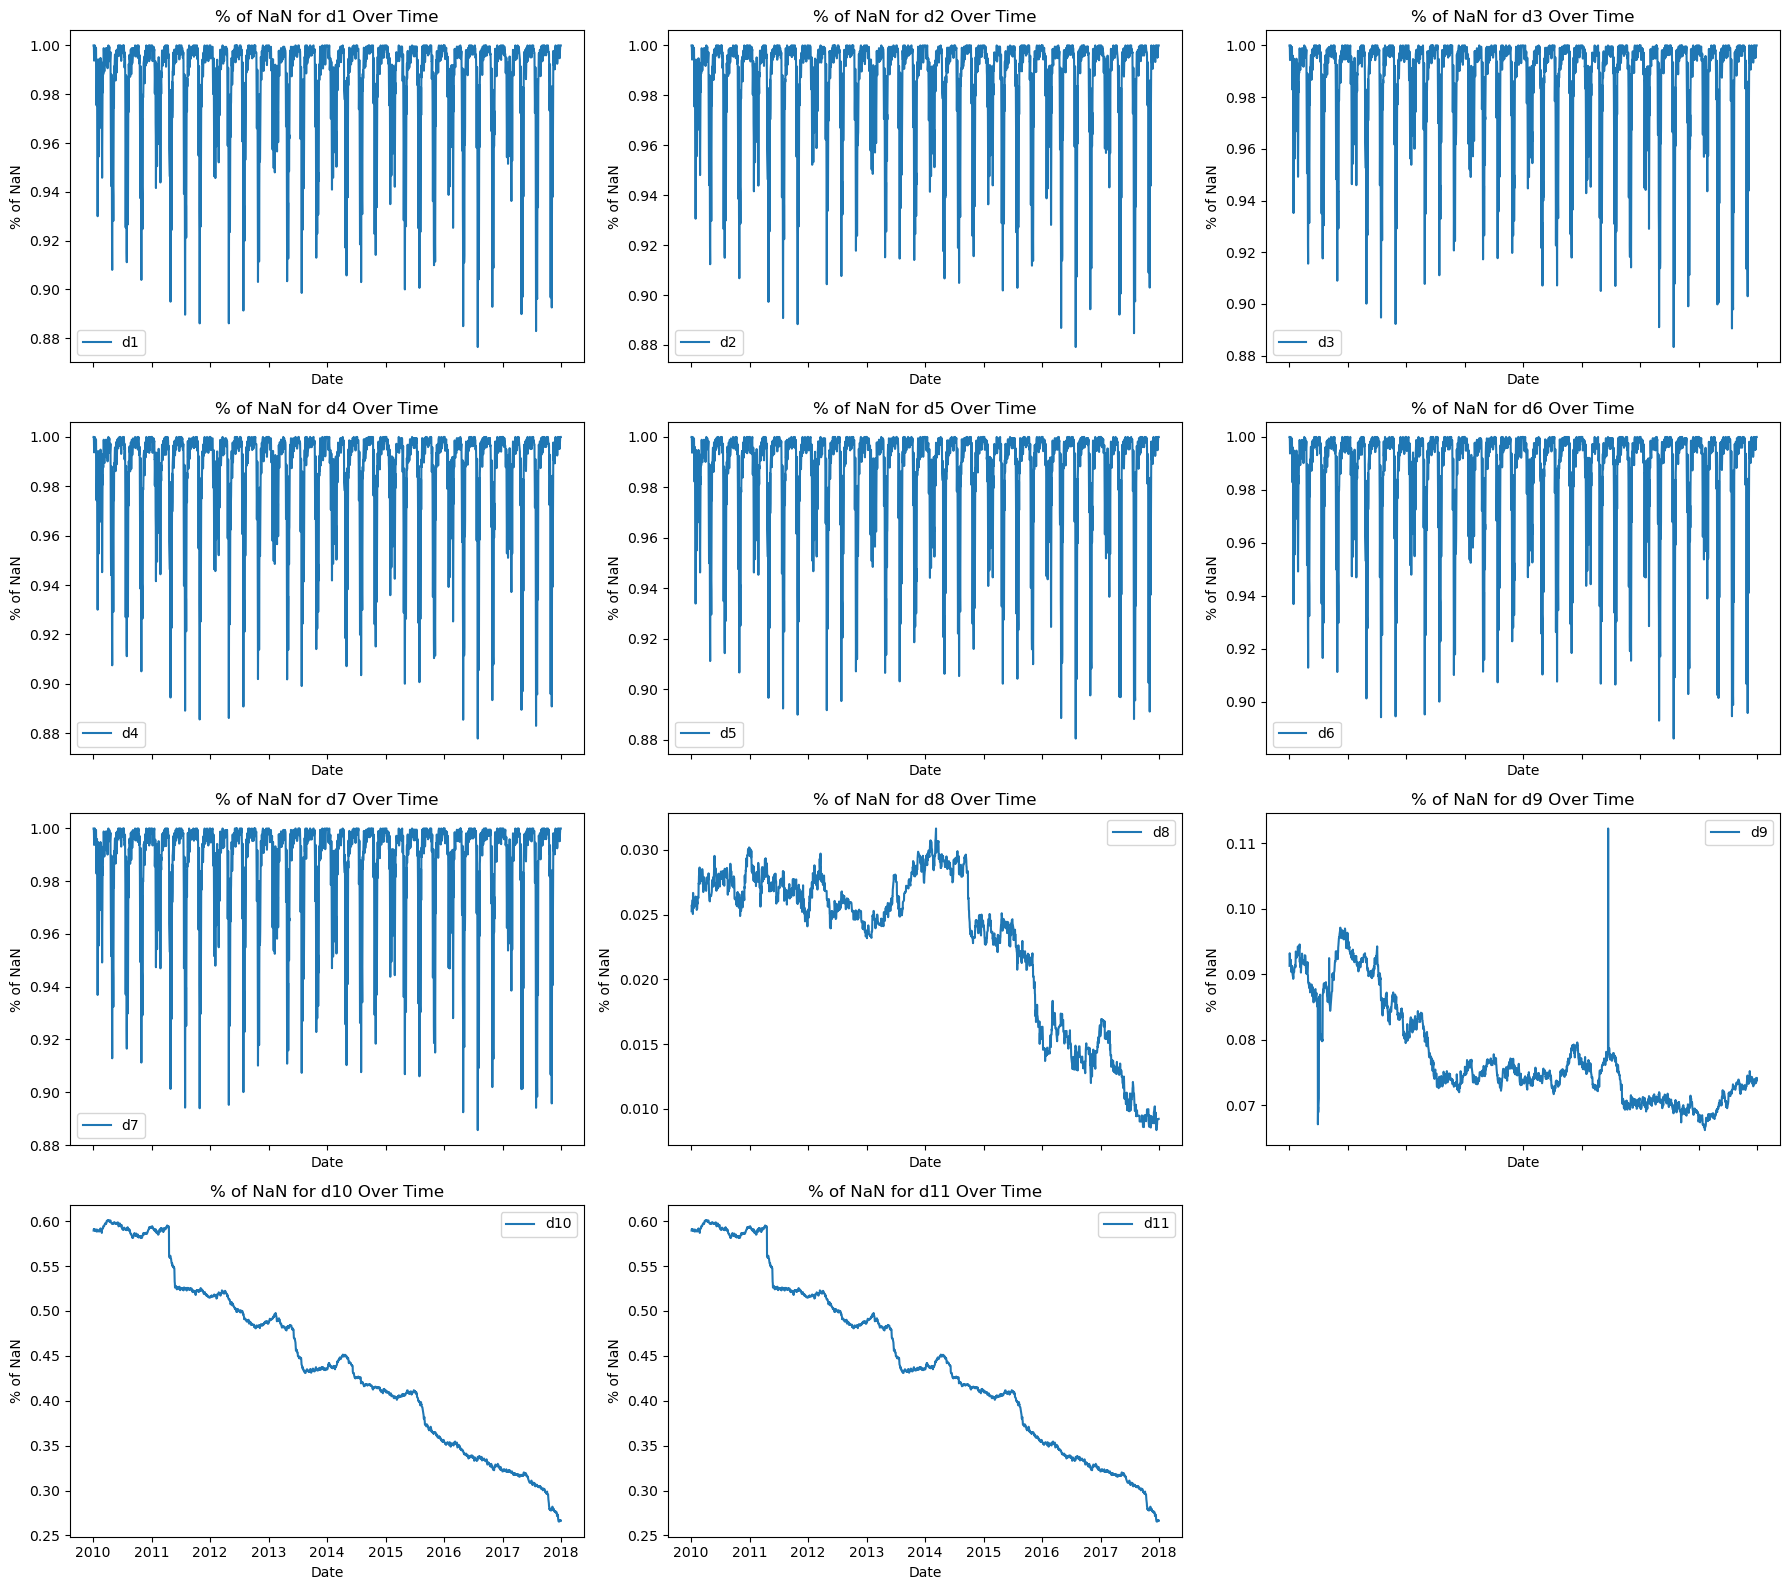

In [133]:
# Create separate time series plots for each feature's NaN percentages
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16), sharex=True)
axes = axes.ravel()  # Flatten the array of axes

for i, feature in enumerate(alpha):
    temp = data_sorted[['data_date','security_id',feature]][feature].isna().groupby(data_sorted['data_date']).mean().reset_index()
    axes[i].plot(temp['data_date'],temp[feature], label=feature)
    axes[i].set_title(f'% of NaN for {feature} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('% of NaN')
    axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

from the nan percentage stats, we find that the d1-d7 are probably updated on month basis but occured in different month.

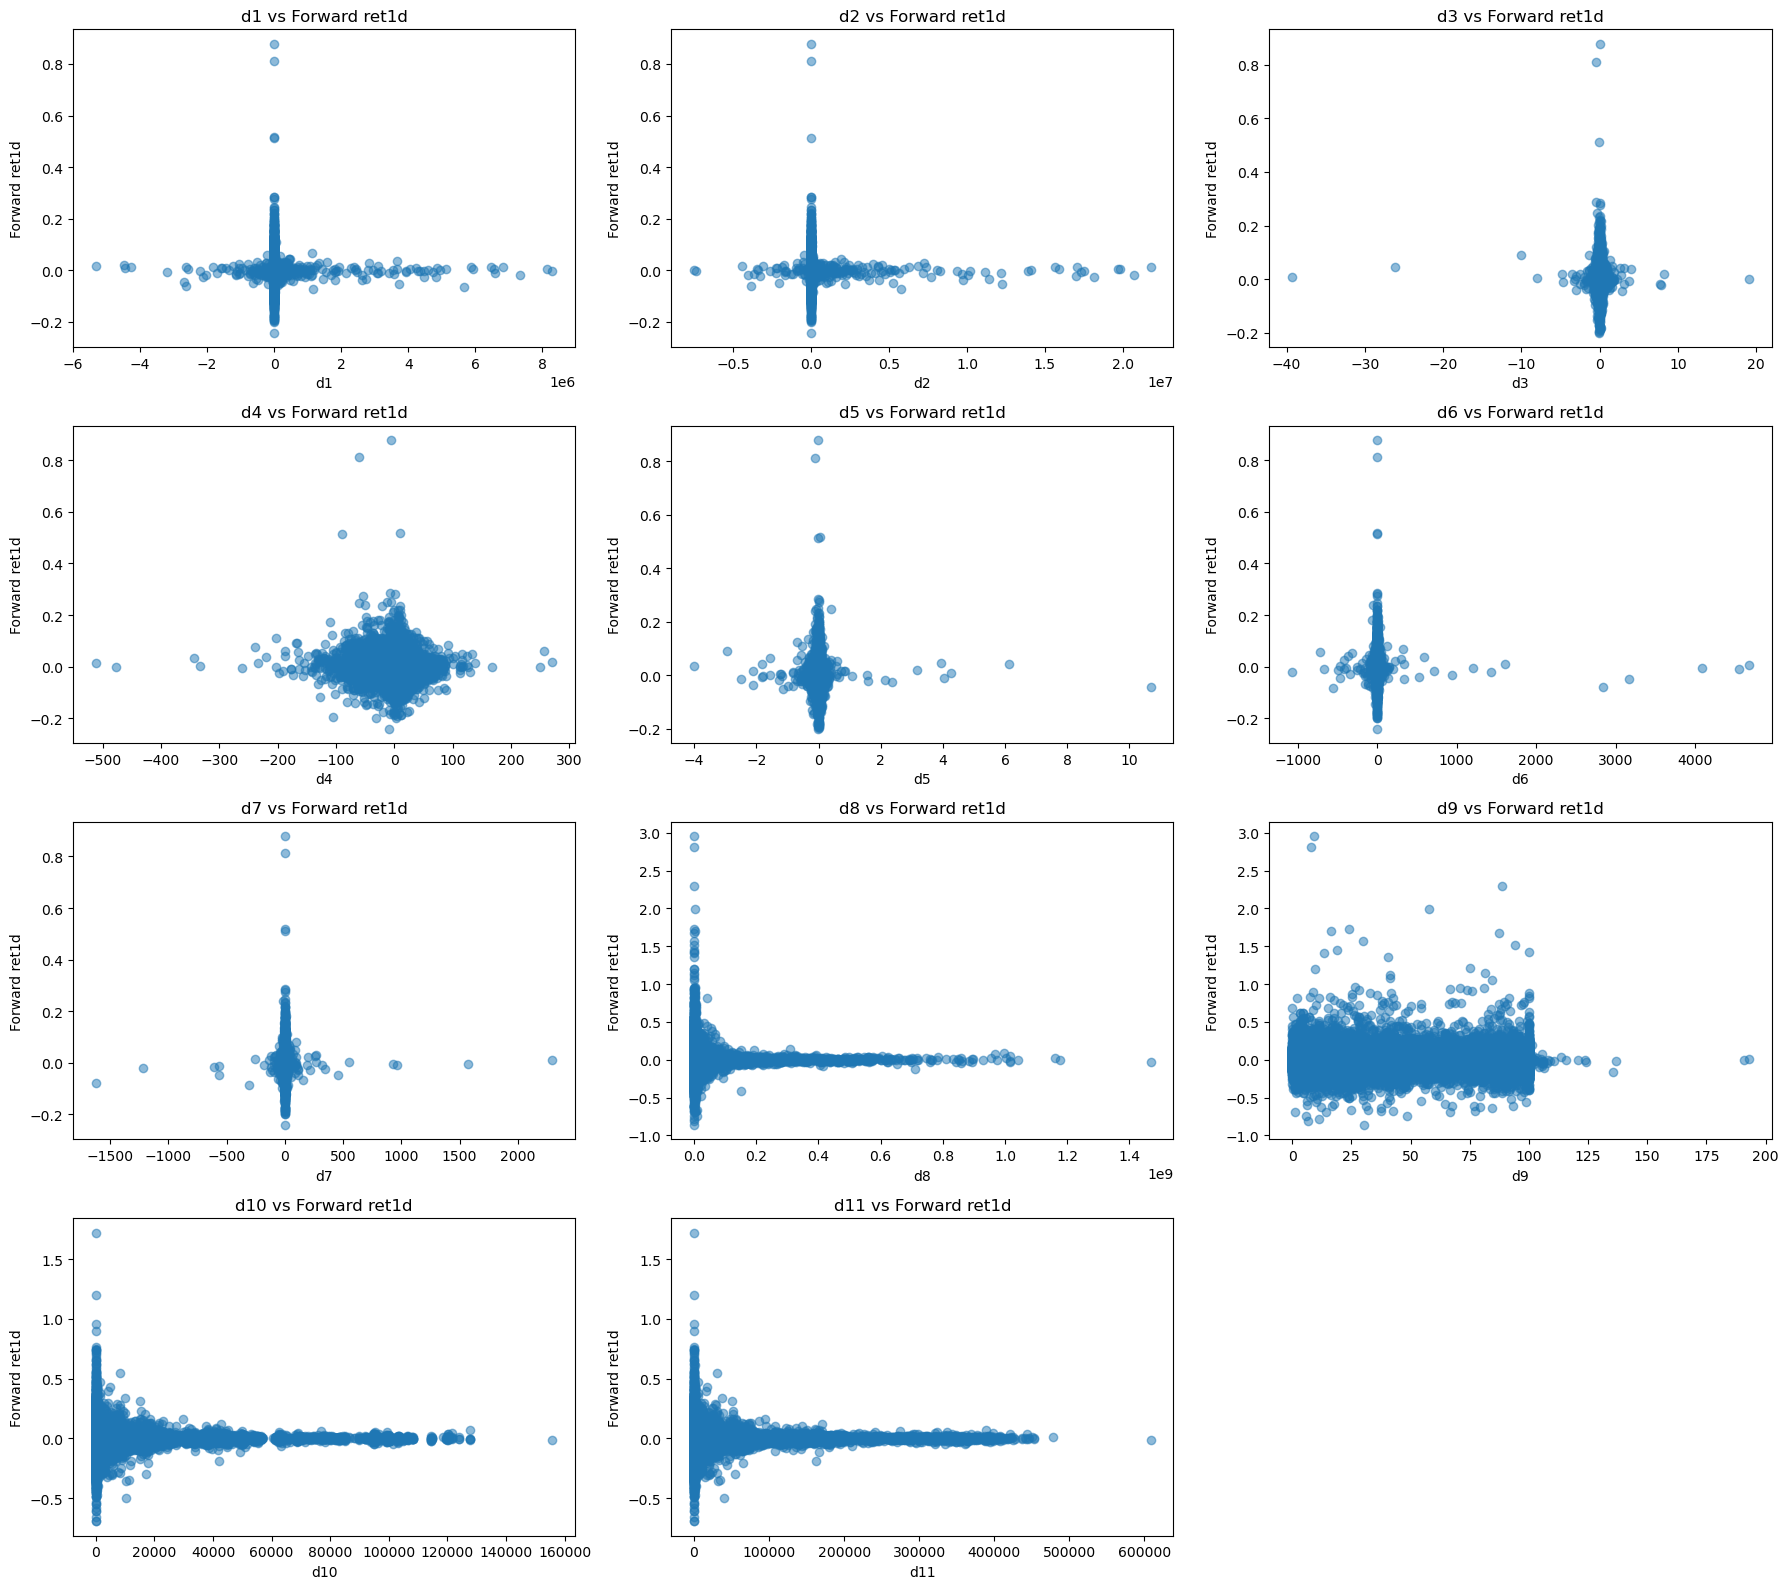

In [134]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.ravel()  # Flatten the array of axes

# Plot each factor in a separate subplot

for i, factor in enumerate(alpha):
    # Prepare the data - drop rows with any NaN values in the current factor or the shifted ret1d
    plot_data = data_sorted[[factor, 'next_ret1d']].dropna()
    
    axes[i].scatter(plot_data[factor], plot_data['next_ret1d'], alpha=0.5)
    axes[i].set_title(f'{factor} vs Forward ret1d')
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Forward ret1d')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

we can see the return has outlier. some are more than 50%. we can also see, the factor has outlier. In next step, I will filter the return and factor within +- \sigma range

In [135]:
from scipy.stats.mstats import winsorize


#mean absolute deviation
def mean_abs_deviation(array_2d,n=5):
    with warnings.catchwarnings():
        warnings.simplefilter("ignore",category = RuntimeWarning)
        median = np.nanmedian(array_2d,axis=1)
        mad = np.nanmedian(np.abs(array_2d - median[:,np.newaxis]))
        lower = median - n*mad
        upper = median + n*mad
        array_new = array_2d.clip(lower[:,np.newaxis],upper[:np.newaxis])
    return array_new

# standard deviation
def stdev(array_2d,n=3):
    with warnings.catchwarnings():
        warnings.simplefilter("ignore",category = RuntimeWarning)
        median = np.nanmedian(array_2d,axis=1)
        std = np.nanstd(array_2d,axis=1)
        lower = median - n*std
        upper = median + n*std
        array_new = array_2d.clip(lower[:,np.newaxis],upper[:np.newaxis])
    return array_new

#percentile
for i in alpha+['next_ret1d']:
    data_sorted[i+'_mod']= winsorize(data_sorted[i], limits=[0.01, 0.01])


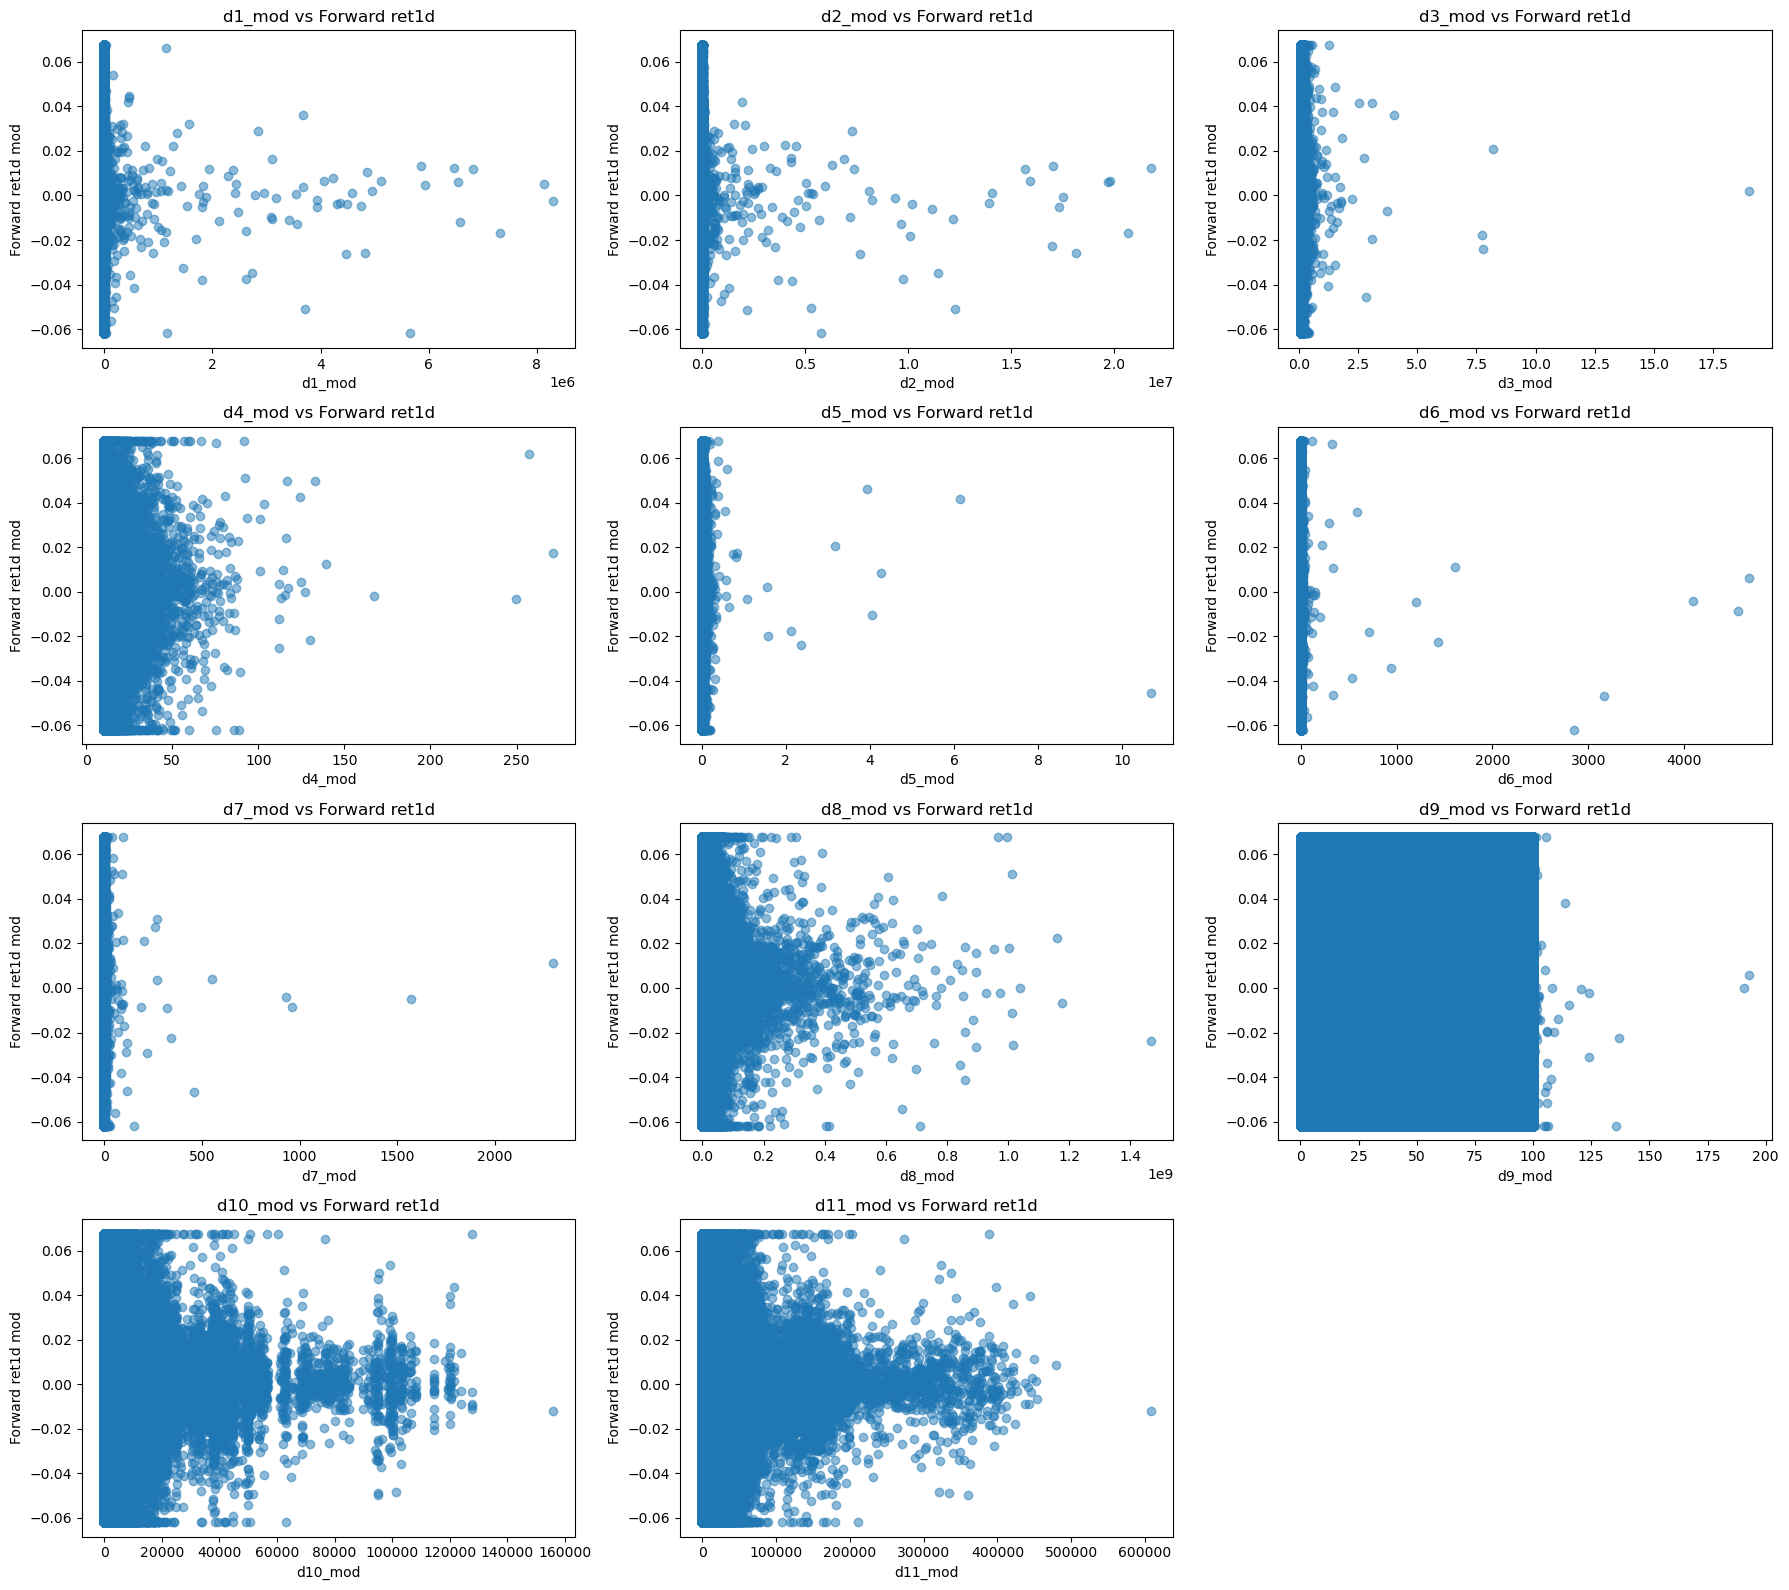

In [136]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.ravel()  # Flatten the array of axes

# Plot each factor in a separate subplot

for i, factor in enumerate(alpha):
    # Prepare the data - drop rows with any NaN values in the current factor or the shifted ret1d
    plot_data = data_sorted[[factor+'_mod', 'next_ret1d_mod']].dropna()
    
    axes[i].scatter(plot_data[factor+'_mod'], plot_data['next_ret1d_mod'], alpha=0.5)
    axes[i].set_title(f'{factor}_mod vs Forward ret1d')
    axes[i].set_xlabel(factor+'_mod')
    axes[i].set_ylabel('Forward ret1d mod')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Compared with pervious plot, we can see the effect from outlier is subtle now. In next step, I will conduct linear regression between each factor to return,

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

regression_results = {}

for factor in alpha:
    # drop nan
    data = data_sorted[[factor+'_mod', 'next_ret1d_mod']].dropna()

    # Define x and y
    X = data[factor+'_mod'].values.reshape(-1, 1)  
    y = data['next_ret1d_mod'].values  

    #define model
    model = LinearRegression()

    # Fit the model
    model.fit(X, y)

    y_pred = model.predict(X)
    residuals = y - y_pred

    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    regression_results[factor] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'mse': mse,
        'r2': r2
    }

In [138]:
pd.DataFrame(regression_results)

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11
coefficient,-8.622710e-10,-5.510273e-10,0.001666,0.000005,0.000924,-0.000005,-1.410878e-06,7.018012e-12,-0.000002,-2.436479e-10,3.693031e-11
intercept,3.855021e-04,4.061935e-04,0.000274,0.000336,0.000343,0.000417,4.076287e-04,6.658342e-04,0.000721,7.062257e-04,7.059658e-04
mse,5.070821e-04,5.061155e-04,0.000513,0.000510,0.000521,0.000519,5.197623e-04,3.970268e-04,0.000399,3.548263e-04,3.548263e-04
r2,2.579070e-05,6.850550e-05,0.000077,0.000002,0.000007,0.000070,7.894734e-07,6.020762e-06,0.000006,1.639927e-09,4.625628e-10


we can find from the result that the r2 is not significant. Next step, I would take a look at the count of factor datapoint for each security. I will remove the security which is lack of factor exposure from the linear regression

In [143]:
regression_results_mod = {}

for factor in alpha:
    # drop nan
    data = data_sorted[[factor+'_mod', 'security_id','next_ret1d_mod']]
    non_nan_counts = data.groupby('security_id')[factor+'_mod'].apply(lambda x: x.notnull().sum())

    # Calculate total counts for each 'sec' to find 80% and 20% of it
    total_counts_90 = non_nan_counts.quantile(0.7)
    total_counts_10 = non_nan_counts.quantile(0.3)


    # Filter out securities where non-NaN count is less than 90% of the total
    filtered_secs = non_nan_counts[(non_nan_counts <= total_counts_90) & (non_nan_counts >= total_counts_10)]

    # Filter the original DataFrame to keep only the securities that meet the criterion
    filtered_df = data[data['security_id'].isin(filtered_secs.index)].dropna()
    print(len(filtered_df['security_id'].unique())/3982)
    # Define x and y
    X = filtered_df [factor+'_mod'].values.reshape(-1, 1)  
    y = filtered_df ['next_ret1d_mod'].values  

    #define model
    model = LinearRegression()

    # Fit the model
    model.fit(X, y)

    y_pred = model.predict(X)
    residuals = y - y_pred

    # performance
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    regression_results_mod[factor] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'mse': mse,
        'r2': r2
    }

0.40607734806629836
0.4455047714716223
0.43872425916624813
0.42064289301858365
0.4171270718232044
0.4211451531893521
0.4229030637870417
0.3997990959316926
0.40005022601707685
0.25715720743345055
0.25715720743345055


In [144]:
pd.DataFrame(regression_results_mod)

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11
coefficient,-2.862717e-09,-5.627692e-10,0.003295,0.000027,0.005738,-0.000005,-9.515453e-07,2.676687e-11,-0.000004,6.108779e-09,2.517631e-09
intercept,6.395373e-04,5.163037e-04,0.000293,0.000293,0.000391,0.000663,6.373840e-04,6.162460e-04,0.000721,7.342175e-04,7.335425e-04
mse,6.842247e-04,6.705567e-04,0.000723,0.000680,0.000720,0.000738,7.405418e-04,4.962295e-04,0.000509,4.706342e-04,4.706341e-04
r2,5.846779e-05,1.444800e-04,0.000095,0.000068,0.000119,0.000172,7.964475e-07,1.270677e-05,0.000018,9.169593e-08,1.928511e-07


IC  TEST

d1-d7 monthly
d8-d11 daily, d8 & d9 have multiple data in one day


In this test, I generate IC and ICIR(#TODO: rolling) test to each factor. The forward return will be T+Frequency+1, and use close vwap as return 

In [188]:
import bottleneck

def test_ic(df,features, frequency) -> pd.DataFrame:
    if frequency == 'M':
        ic = pd.DataFrame(index=df['year_month'].unique())

        for date in ic.index:
            month_data = df[df['year_month'] == date]

            for feature in features:
                # Skip if not sufficient
                if month_data[feature+'_mod'].isna().all() or month_data['next_ret1d_mod'].isna().all():
                    continue
                
                # Calculate the correlation (IC) 
                correlation = month_data[feature+'_mod'].corr(month_data['next_ret1d_mod'])
                
                # Store the monthly IC
                ic.at[date, feature+'_mod'] = correlation
        ic.sort_index(inplace=True)
        return ic
        
    elif frequency == 'D':
        ic = pd.DataFrame(index=df['data_date'].unique())

        for date in ic.index:
            month_data = df[df['data_date'] == date]

            for feature in features:
                # Skip if not sufficient
                if month_data[feature+'_mod'].isna().all() or month_data['next_ret1d_mod'].isna().all():
                    continue
                
                # Calculate the correlation 
                correlation = month_data[feature+'_mod'].corr(month_data['next_ret1d_mod'])
                
                # Store the monthly IC
                ic.at[date, feature+'_mod'] = correlation
        ic.sort_index(inplace=True)
        return ic



d1-d7, drop na, and calculate monthly frequency

In [183]:
features_1_7 = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7']
factor_1_7= data_sorted.copy()
factor_1_7['year_month'] = factor_1_7['data_date'].dt.to_period('M')
factor_1_7 = factor_1_7.drop_duplicates(subset=['year_month','security_id'])
factor_1_7


,data_date,security_id,close_price,volume,group_id,in_trading_universe,ret1d,d1,d2,d3,...,d4_mod,d5_mod,d6_mod,d7_mod,d8_mod,d9_mod,d10_mod,d11_mod,next_ret1d_mod,year_month
5448641,2016-03-31,1031,11.97,3852253.0,40202010,Y,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2056370.0,7.88,92.0,357.841172,-0.026734,2016-03
5452481,2016-04-01,1031,11.65,4524542.0,40202010,Y,-0.026734,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3164530.0,6.52,99.0,333.057109,0.002575,2016-04
5532338,2016-05-02,1031,13.65,2607045.0,40202010,Y,-0.001463,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2368000.0,4.48,102.0,401.304888,-0.036630,2016-05
5609752,2016-06-01,1031,13.59,3281317.0,40202010,Y,0.002918,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2147020.0,4.95,103.0,366.730392,0.002943,2016-06
5689840,2016-07-01,1031,12.30,3072625.0,40202010,Y,0.029289,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2005520.0,5.58,114.0,430.483225,-0.041463,2016-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6854364,2017-10-12,1117357001,8.13,1268473.0,10102020,Y,-0.019300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.88,NaN,NaN,-0.002460,2017-10
6903191,2017-11-01,1117357001,7.89,1403205.0,10102020,Y,-0.006297,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.86,NaN,NaN,0.020279,2017-11
6979647,2017-12-01,1117357001,9.45,2725473.0,10102020,Y,-0.014599,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.68,NaN,NaN,-0.005291,2017-12
7030962,2017-12-21,1117382401,20.97,5882908.0,25401025,Y,0.030973,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8237540.0,74.97,629.0,2505.062000,0.001907,2017-12


In [191]:
ic_1_7 = test_ic(factor_1_7,features_1_7,'M')

c:\Users\Runjia Shen\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Runjia Shen\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [193]:
ic_1_7

,d1_mod,d2_mod,d3_mod,d4_mod,d5_mod,d6_mod,d7_mod
2010-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02,0.152964,0.008643,-0.270651,0.174025,0.186186,0.349465,NaN
2010-03,-0.107797,-0.021960,-0.341082,0.169641,-0.207990,0.442267,0.426877
2010-04,-0.039209,-0.054465,0.310279,0.024181,0.188193,-0.158059,-0.273116
2010-05,-0.269865,-0.091304,-0.028119,0.066431,-0.185828,-0.016562,0.033019
...,...,...,...,...,...,...,...
2017-08,0.150241,0.192419,-0.290288,-0.259171,0.073433,-0.116335,-0.324236
2017-09,-0.011190,0.284333,-0.571006,0.308884,0.302529,-0.441334,-0.297296
2017-10,0.145120,0.219672,NaN,0.321479,0.340169,0.340169,-0.774649
2017-11,0.133866,0.070374,0.152848,-0.090649,-0.005066,0.229509,0.106911


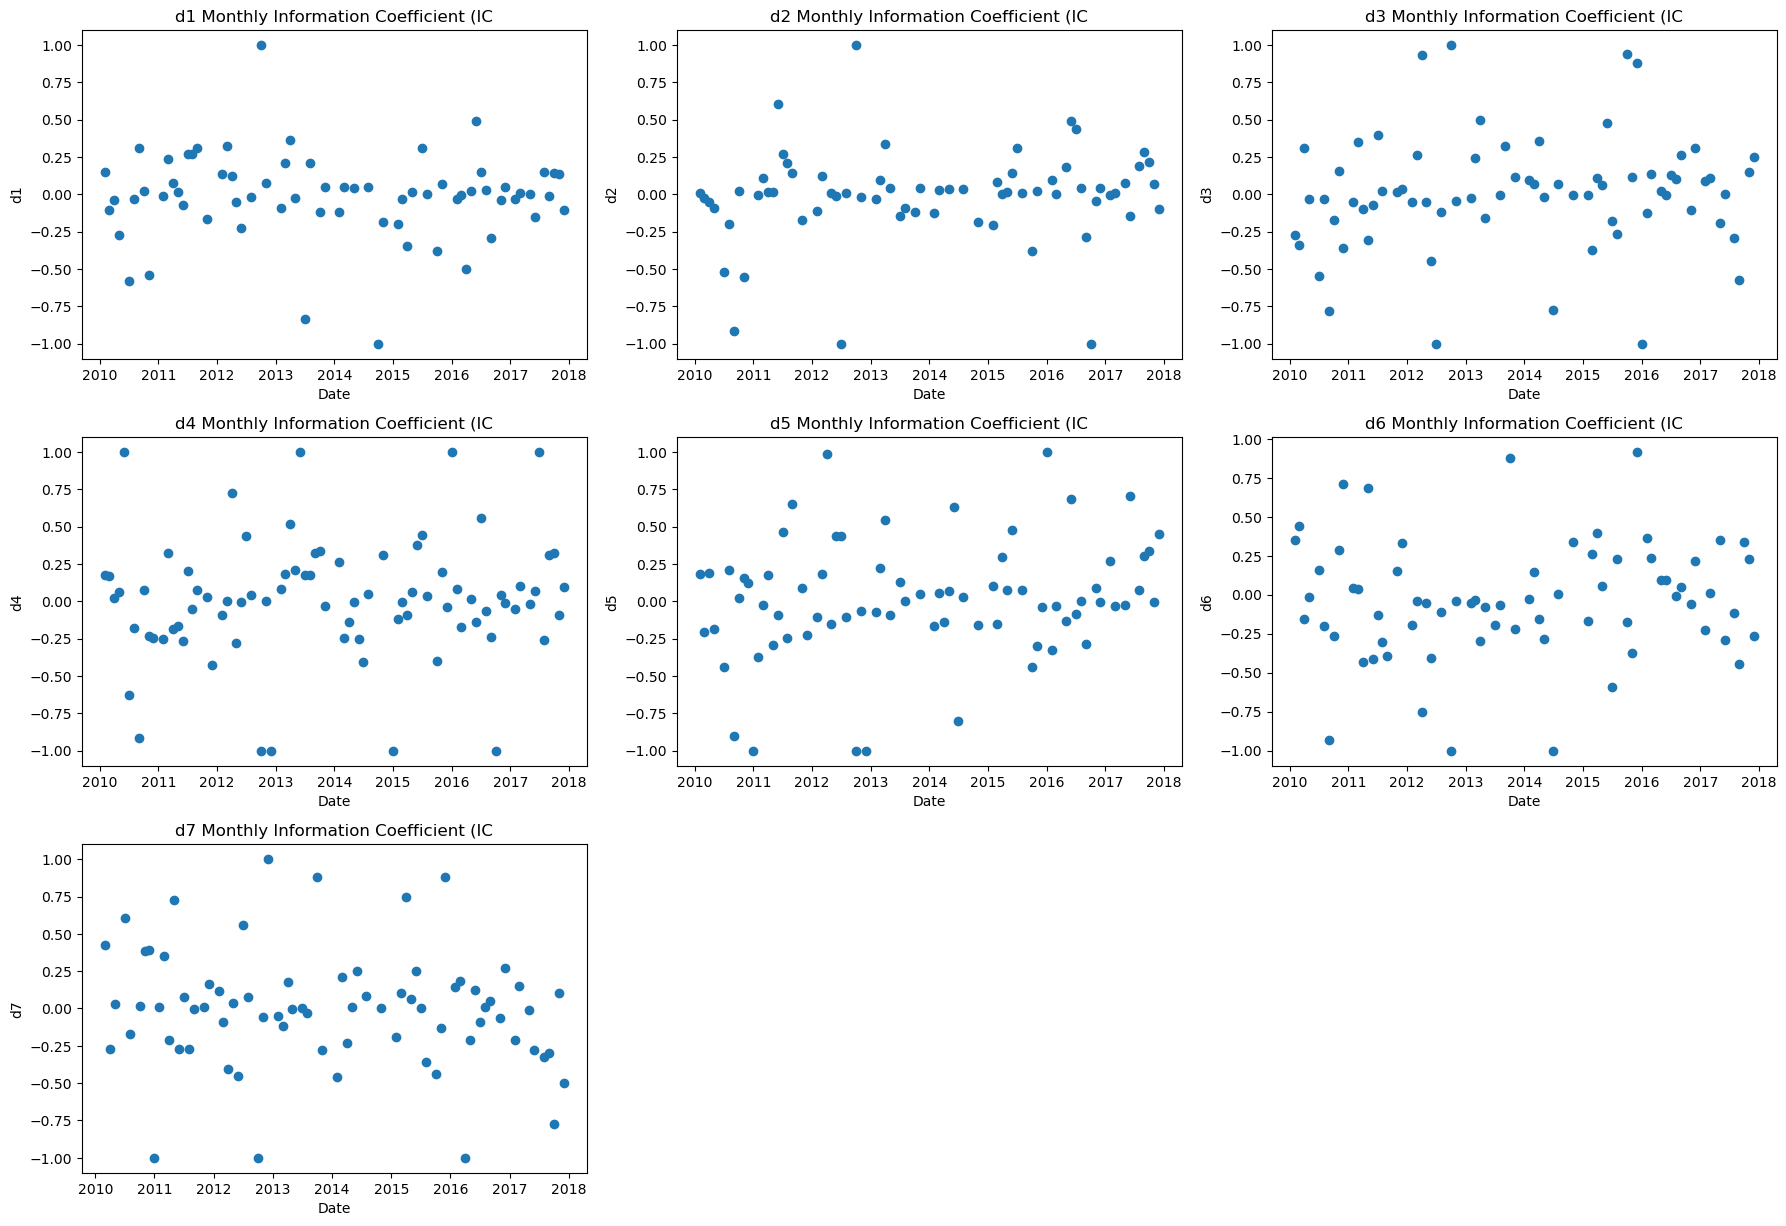

In [201]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.ravel()  # Flatten the array of axes

# Plot each factor in a separate subplot

for i, factor in enumerate(features_1_7):
    
    axes[i].scatter(ic_1_7.index.to_timestamp(),ic_1_7[factor+'_mod'], marker = 'o')
    axes[i].set_title(f'{factor} Monthly Information Coefficient (IC')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{factor}')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

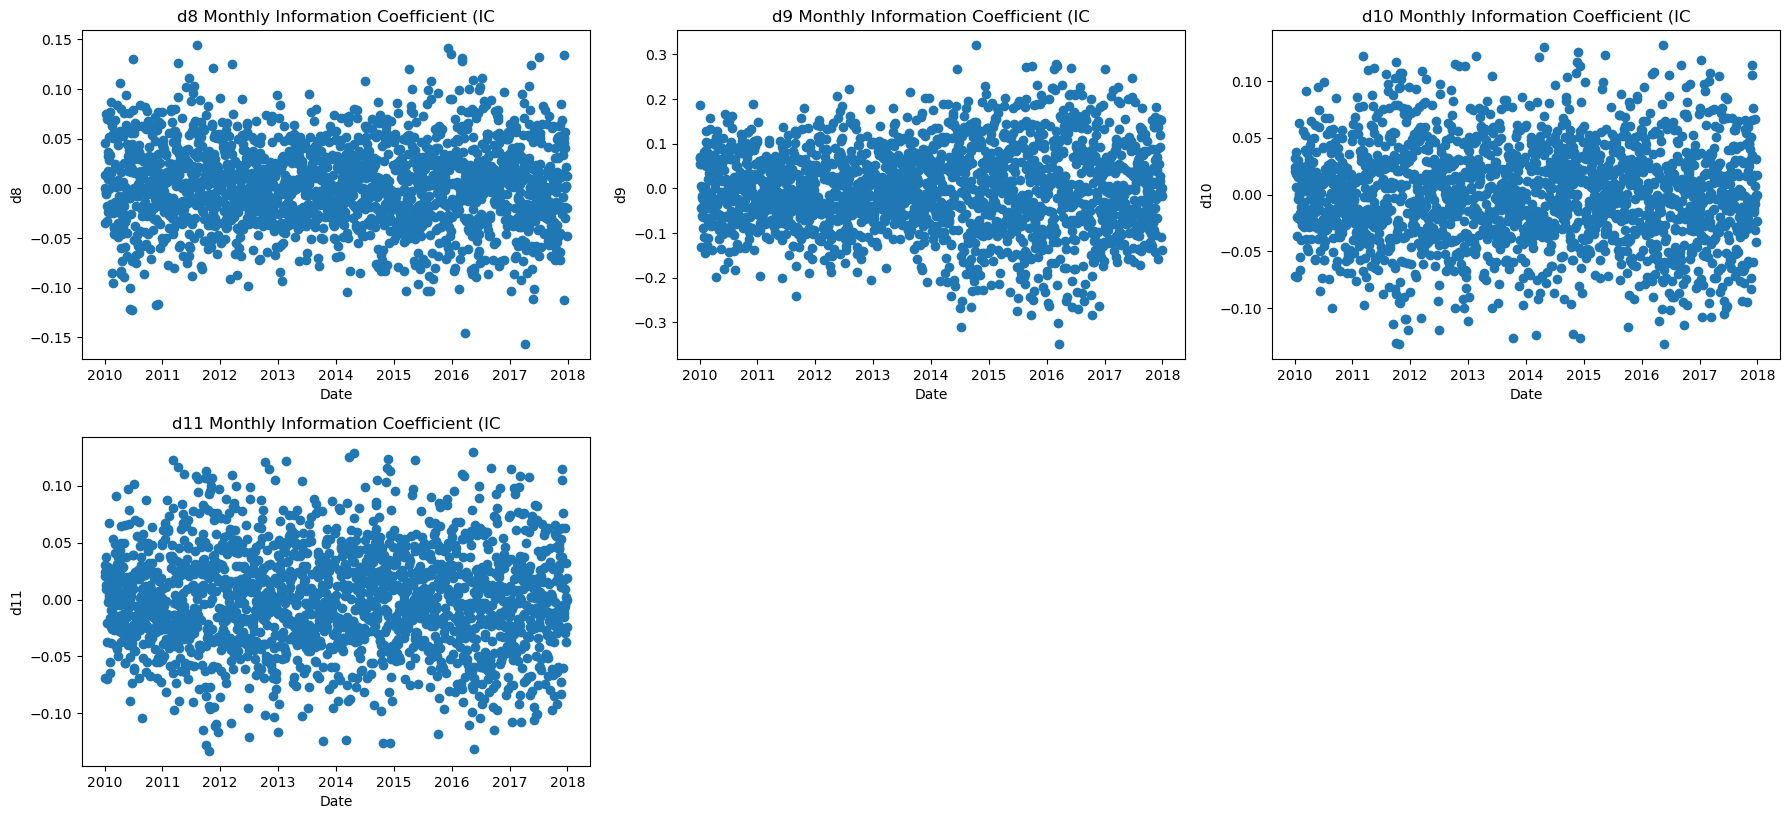

In [205]:
features_8_11 = ['d8', 'd9', 'd10', 'd11']
factor_8_11= data_sorted.copy()

ic_8_11 = test_ic(factor_8_11,features_8_11,'D')

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.ravel()  # Flatten the array of axes

# Plot each factor in a separate subplot

for i, factor in enumerate(features_8_11):

    axes[i].scatter(ic_8_11.index,ic_8_11[factor+'_mod'], marker = 'o')
    axes[i].set_title(f'{factor} Monthly Information Coefficient (IC')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{factor}')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Next, for each factor in d1-d7, I will long top 3% and short bottom 3%, all equal weight

In [233]:
def get_top_bottom_tickers(df,factor, percentile=2):
    top = set()
    bottom= set()
    # iterate each factor
    for i in factor:
        
        top_threshold = df[i+'_mod'].quantile(1 - percentile/100)
        bottom_threshold = df[i+'_mod'].quantile(percentile/100)
        
        # Get top 5% and bottom 5% tickers
        top_tickers = df[df[i+'_mod'] >= top_threshold]['security_id'].tolist()
        bottom_tickers = df[df[i+'_mod'] <= bottom_threshold]['security_id'].tolist()
    
        top |= set(top_tickers)
        bottom |= set(bottom_tickers)

    
    return top, bottom

I filter out the factors with significant r2 in d1-d11, and take each date and each factor in d1,d2,d3,d5 and d6 monthly, and do long/short trade

In [237]:
# Apply the function to each day's data to get a list of top and bottom tickers for each day
grouped = factor_1_7.groupby('year_month')
top_bottom_tickers_by_date = {date: get_top_bottom_tickers(group,['d1','d2','d3','d5','d6']) for date, group in grouped}

list(top_bottom_tickers_by_date.items())[:5]

[(Period('2010-01', 'M'), ({1632201}, {1632201})),
 (Period('2010-02', 'M'),
  ({1379001, 2035901, 3389401, 4510601, 5534201},
   {208101,
    728301,
    741101,
    1379001,
    1641601,
    2035901,
    3150901,
    3365101,
    3389401,
    3543001,
    4510601,
    4850201,
    5044301,
    5373201,
    5534201,
    7002901,
    8215701})),
 (Period('2010-03', 'M'),
  ({3150401, 3713301, 4408201, 5315001, 31712501},
   {102501,
    217101,
    476001,
    1147701,
    1303701,
    1613301,
    1616101,
    1975201,
    2168601,
    2528201,
    2955501,
    3097801,
    3150401,
    3713301,
    3744401,
    3809201,
    3830201,
    4206401,
    4408201,
    4719301,
    5315001,
    5506601,
    5525201,
    7506401,
    7521501,
    8423501,
    8490801,
    17336701,
    31712501,
    33426601,
    1090624801})),
 (Period('2010-04', 'M'),
  ({3871101, 4149701, 4734801, 29233001},
   {199401,
    1004601,
    1137701,
    1350001,
    1399801,
    3039001,
    3557001,
    3772

calculate daily return

In [253]:
def daily_return(group, top_tickers, bottom_tickers):
    
    # Calculate the weights
    num_top_tickers = len(top_tickers)
    num_bottom_tickers = len(bottom_tickers)
    
    # Avoid division by zero
    top_weight = 1.0 / num_top_tickers if num_top_tickers > 0 else 0
    bottom_weight = -1.0 / num_bottom_tickers if num_bottom_tickers > 0 else 0
    
    # Calculate the return for the day: long top, short bottom
    daily_return = 0
    if num_top_tickers > 0:
        daily_return += (group[group['security_id'].isin(top_tickers)]['next_ret1d'].mean() * top_weight)
    if num_bottom_tickers > 0:
        daily_return += (group[group['security_id'].isin(bottom_tickers)]['next_ret1d'].mean() * bottom_weight)
    
    return daily_return

# Calculate daily returns for each day
daily_returns = {}
for date, (top_tickers, bottom_tickers) in top_bottom_tickers_by_date.items():
    group = grouped.get_group(date)
    daily_returns[date] = daily_return(group, top_tickers, bottom_tickers)

# Convert the daily returns into a DataFrame
daily_returns_df = pd.DataFrame(list(daily_returns.items()), columns=['Date', 'Monthly_Return'])

# Display the first few rows of the daily returns DataFrame
daily_returns_df.head()

,Date,Monthly_Return
0,2010-01,0.000000
1,2010-02,0.003714
2,2010-03,0.001624
3,2010-04,0.006221
4,2010-05,-0.008030


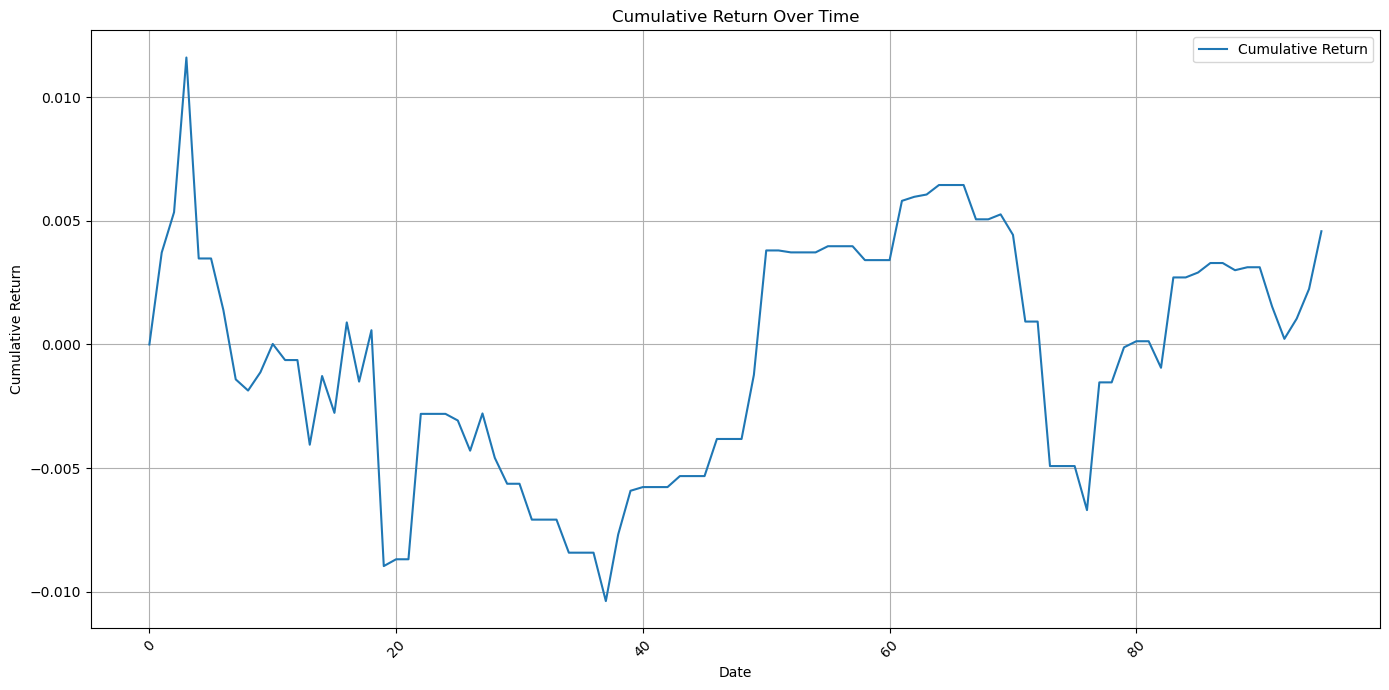

In [254]:
daily_returns_df['Cumulative_Return'] = (1 + daily_returns_df['Monthly_Return']).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(daily_returns_df['Cumulative_Return'], label='Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the plot elements
plt.show()

In [258]:
def annualized_return(nav):
   
   return pow(nav[-1] / nav[0], 12/len(nav)) - 1


def annualized_vol(month):
   
   return month.std() * np.sqrt(250)

def sharp_ratio(month,nav):
   
   return annualized_return(nav) / annualized_vol(nav)

def max_drawndown(nav):
   
   drawdown = 0
   
   for index in range(1,len(nav)):
       
       cur_drawndown = nav[index] / max(nav[0:index]) - 1
       
       if cur_drawndown < drawdown:
           
           drawdown = cur_drawndown
       
   return drawdown


def calmar_ratio(nav):
   
   return annualized_return(nav) / -max_drawndown(nav)


def performance(month,nav):

   perf = pd.Series({'annualized_return' : annualized_return(nav),
                     'annualized_vol' : annualized_vol(month),
                     'sharp_ratio'   : sharp_ratio(month,nav),
                     'max_drawndown'   : max_drawndown(nav),
                     'calmar_ratio'   : calmar_ratio(nav)})
   return perf

In [259]:
performance(daily_returns_df['Monthly_Return'].values[1:],daily_returns_df['Cumulative_Return'].values[1:])

annualized_return    0.026719
annualized_vol       0.035552
sharp_ratio          0.360517
max_drawndown       -1.894376
calmar_ratio         0.014104
dtype: float64

In conclusion, this strategy generats pnl for 0.027 annualized return, sharp ratio 0.36, max_drawndown -1.89